# Usage of Chemical Names in RHEA and GO

See also [these slides](https://docs.google.com/presentation/d/1JvidhE4mzbyruSCSUrtEyTyYJGGll4ECN8SOhP28_zo/edit?usp=sharing)

## Background

RHEA uses CHEBI to describe the participants in a reaction, e.g. for [RHEA:14057](https://www.rhea-db.org/reaction?id=14057) (a 1,2-diacyl-sn-glycerol + a glycerophospholipid = a monoacylglycerophospholipid + a triacyl-sn-glycerol)

![img](images/rhea-14057.png)


See for example the Rhea label **triacyl-_sn_-glycerol matches** [CHEBI:64615](https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:64615)

Here we report on an analysis of usage of chemical entity names in Rhea vs CHEBI

## Rhea Chebi Name matches

We load a pre-generated file https://github.com/cmungall/reactioner/tree/master/reports

This maps the name used in Rhea (after removing any "a" prefix) to a CHEBI name (if available), if not available to a syn. We also include the CHEBI synonym source.

Also, if it doesn't match a name we also see if it maps to IDs for **different** CHEBIs

In [1]:
## Import libraries and methods
import pandas as pd
from notebook_utils import create_venn, create_upset
%matplotlib inline

In [15]:
## Fetch xref data and set up DBs
df = pd.read_csv("reports/compare_rhea_chebi_names.tsv", sep="\t").fillna("")
## Show samples
df

,rhea_participant,pred,xrefs,chebi,chebi label,ambigs,ambigs label,ambig_relations
0,((9Z)-hexadecenoyl-tetradecanoyl)-(Kdo)2-lipid A,related,UniProt,CHEBI:61522,(KDO)2-(palmitoleoyl-myristoyl)-lipid A(6-),,,
1,"(+)-(1(10)E,4E,6S,7R)-germacradien-6-ol",exact,UniProt,CHEBI:137564,"(+)-(1(10)E,4E,6S,7R)-germacradien-6-ol",,,
2,"(+)-(2S,3R,9R)-pristinol",exact,UniProt,CHEBI:138165,"(+)-(2S,3R,9R)-pristinol",,,
3,(+)-(R)-germacrene A,related,UniProt,CHEBI:41595,(+)-germacrene A,,,
4,(+)-2-epi-prezizaene,exact,UniProt,CHEBI:62762,(+)-2-epi-prezizaene,,,
5,(+)-3'-hydroxylarreatricin,exact,UniProt,CHEBI:67154,(+)-3'-hydroxylarreatricin,,,
6,(+)-5-epi-aristolochene,exact,UniProt,CHEBI:23925,(+)-5-epi-aristolochene,,,
7,(+)-6-endo-hydroxycamphor,exact,UniProt,CHEBI:64787,(+)-6-endo-hydroxycamphor,,,
8,(+)-6-exo-hydroxycamphor,exact,UniProt,CHEBI:64786,(+)-6-exo-hydroxycamphor,,,
9,(+)-6a-hydroxymaackiain,exact,UniProt,CHEBI:43129,(+)-6a-hydroxymaackiain,,,


## Plot how often Rhea name matches CHEBI name/synonym/none

Note this is logarithmic

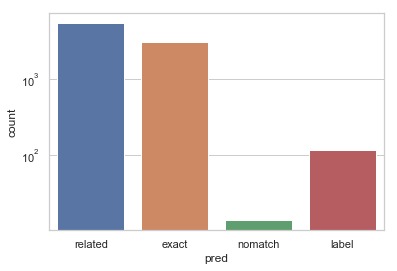

In [20]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
g = sns.countplot(x="pred", data=df)
g.set_yscale('log')

In [17]:
df['has_uniprot'] = df.apply(lambda row: 'UniProt' in row['xrefs'], axis=1)
df

,rhea_participant,pred,xrefs,chebi,chebi label,ambigs,ambigs label,ambig_relations,has_uniprot
0,((9Z)-hexadecenoyl-tetradecanoyl)-(Kdo)2-lipid A,related,UniProt,CHEBI:61522,(KDO)2-(palmitoleoyl-myristoyl)-lipid A(6-),,,,True
1,"(+)-(1(10)E,4E,6S,7R)-germacradien-6-ol",exact,UniProt,CHEBI:137564,"(+)-(1(10)E,4E,6S,7R)-germacradien-6-ol",,,,True
2,"(+)-(2S,3R,9R)-pristinol",exact,UniProt,CHEBI:138165,"(+)-(2S,3R,9R)-pristinol",,,,True
3,(+)-(R)-germacrene A,related,UniProt,CHEBI:41595,(+)-germacrene A,,,,True
4,(+)-2-epi-prezizaene,exact,UniProt,CHEBI:62762,(+)-2-epi-prezizaene,,,,True
5,(+)-3'-hydroxylarreatricin,exact,UniProt,CHEBI:67154,(+)-3'-hydroxylarreatricin,,,,True
6,(+)-5-epi-aristolochene,exact,UniProt,CHEBI:23925,(+)-5-epi-aristolochene,,,,True
7,(+)-6-endo-hydroxycamphor,exact,UniProt,CHEBI:64787,(+)-6-endo-hydroxycamphor,,,,True
8,(+)-6-exo-hydroxycamphor,exact,UniProt,CHEBI:64786,(+)-6-exo-hydroxycamphor,,,,True
9,(+)-6a-hydroxymaackiain,exact,UniProt,CHEBI:43129,(+)-6a-hydroxymaackiain,,,,True


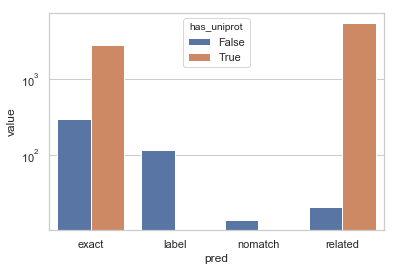

In [19]:
ct = pd.crosstab(df.pred, df.has_uniprot)
stacked = ct.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
g = sns.barplot(x=stacked.pred, y=stacked.value, hue=stacked.has_uniprot)
g.set_yscale('log')